# Compute Architecure - Assessment
**Course**: TU 2025 25-26: 8645 -- COMPUTER INFRASTRUCTURE  
**Lecturer**: Ian McLauglin  
**Author**: Clyde Watts  








### Imports

yfinance - financial ticker data from yahoo  - [yfinance](https://github.com/ranaroussi/yfinance)
datetime - pythons inbuild date time
logging - python logging
os - operating system functions
glob - file selector

In [7]:

import logging
from datetime import datetime, timedelta
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

##  Initialisation

In [3]:
# init logging
logging.basicConfig(level=logging.INFO)

In [4]:
# Delete all CSV files in the data directory
data_path = "./data/"
files = glob.glob(os.path.join(data_path, "*.csv"))
for f in files:
    print(f"Deleting file: {f}")
    os.remove(f)

Deleting file: ./data\20251027_195245.csv


## Problem 1: Data from yfinance

Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.
Create the `data` folder if you don't already have one.

## Problem 1: Requirements ##

### Extract ###

1.  Extract from yfinance data the stock data for META,AAPL,AMZN,NFLX,GOOG
2.  For 5 complete previous days trading , we need to take into account that NASDAQ trades from Monday to Friday. If we go back 7 days we will always ignore weekends
3.  File format will YYYYMMDD-HHmmss.csv where YYYY - is 4 digit year , MM month 01-12 , DD - is 01-31. HH - hours , 24 our clock , mm - minutes 00-59 , seconds 00-59.
4.  Grain - Hour

Column
Date , <ticket> ( Open,High,Low,Close,Volume) ....
ticket is META , AAPL , AMZN , NFLX or GOOG
Open - open price
Close - close price
High - High pricr
Low - Low price
Volumn - Volume in period

The data frame return has an index on the date , and is a multilevel index. Level one is the ticket , and the second level is the metric - that is open , close , high , low prices and volume 
 

Todo:

1. Take Into account non-trading days as well as weekends - considered over engineering
1. Add a time column with EST instead of UCT.

__Function : get_data__

This downloads the latest data for a number of listed stock companies using yfinance module and writes to CSV file. 

In [28]:
# prototype for extracting stock data
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]
def get_data(tickers = tickers,start_date=None, end_date=None,interval="1h",data_path="./data/"):
    """
    Function to get stock data from yfinance

    Parameters:
    tickers (list): List of stock tickers to download data for
    start_date (str): Start date for data in format "YYYY-MM-DD". If None, defaults to 6 days ago.
    end_date (str): End date for data in format "YYYY-MM-DD". If None, defaults to yesterday.
    interval (str): Data interval. Default is "1h".
    data_path (str): Path to save the data. Default is "./data/".
    Returns:
       return_code : 0 for success, -1 for failure
       return_message : message indicating success or failure
       file_name (str): Name of the file where data is saved
    """
    return_code = 0
    return_message = "Success"
    file_name = None
    if start_date is None:
        # Variation of the fence posting to get last 7 days of data
        start_date = (datetime.now() - timedelta(days=7)).strftime("%Y-%m-%d")
        # create file name based on current date and time
        file_name = f"{data_path}{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
    else:
        # convert start_date to datetime object
        start_date_time = datetime.strptime(start_date, "%Y-%m-%d")
        # create file name based on start time and 23:59:59 of end date
        start_date_str = start_date_time.strftime("%Y%m%d") + "_235959"
        file_name = f"{data_path}{start_date_str}.csv"
    # if end_date is None , set to today - 0 days this means yesterday's data inclusive
    if end_date is None:
        end_date = (datetime.now() - timedelta(days=0)).strftime("%Y-%m-%d")
    else: # convert end_date to datetime object
        end_date_time = datetime.strptime(end_date, "%Y-%m-%d")
        # add 1 day to end_date to make it inclusive
        end_date = (end_date_time + timedelta(days=1)).strftime("%Y-%m-%d")
    # check if directory exists
    if not os.path.exists(data_path):
        logging.info(f"Creating directory: {data_path}")
        try:
            os.makedirs(data_path)
        except Exception as e:
            logging.error(f"Error creating directory: {e}")
            return_code = -1
            return_message = f"Error creating directory: {e}"
            return return_code, return_message, None
    # if file exists then delete it
    if os.path.exists(file_name):
        logging.info(f"Deleting existing file: {file_name}")
        try:
            os.remove(file_name)
        except Exception as e:
            logging.error(f"Error deleting file: {e}")
            return_code = -1
            return_message = f"Error deleting file: {e}"
            return return_code, return_message, None
    logging.info(f"Start Date: {start_date}, End Date: {end_date}")
    try:
        df_data = yf.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
    except Exception as e:
        logging.error(f"Error downloading data: {e}")
        return_code = -1
        return_message = f"Error downloading data: {e}"
        return return_code, return_message, None
    # Save the data to a CSV file
    df_data.to_csv(file_name)
    return return_code, return_message, file_name
   



Extract the latest stock data into a data frame

In [29]:
print("Starting data download...")
return_code, return_message, file_name = get_data(tickers=tickers)
print(f"Return Code: {return_code}, Message: {return_message}, File: {file_name}")
df_data = get_data(tickers=tickers) 

C:\Users\cw171001\AppData\Local\Temp\ipykernel_37476\3298150898.py:61: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_data = yf.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
[*********************100%***********************]  5 of 5 completed

Starting data download...
Return Code: 0, Message: Success, File: ./data/20251031_002340.csv



C:\Users\cw171001\AppData\Local\Temp\ipykernel_37476\3298150898.py:61: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_data = yf.download(tickers, interval=interval, group_by='ticker',start=start_date, end=end_date)
[*********************100%***********************]  5 of 5 completed


## Problem 2: Plotting Data

Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.
The plot should include axis labels, a legend, and the date as a title.
The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.
Create the `plots` folder if you don't already have one.

Requirements

1. Glob the data folder for YYYYMMDD_hhmmss.csv files. 
    1. We will glob the files looking for the pattern 20*.*csv
    1.

References

https://docs.python.org/3/library/glob.html


Clear Down Data before test

__Function : get_the_latest_file__

This scans directory ./data ( parameter ) using a pattern 20....csv to get the latest file and returns the file name

In [30]:
def get_the_latest_file(data_path="./data/"):
    """get_the_latest_file

    Args:
        data_path (str): The path to the directory containing the data files.

    Returns:
        str: The path to the latest data file, or None if no files are found.
    """
    return_code = 0
    return_message = "Success"
    latest_file = None

    logging.info(f"Getting the latest file from {data_path}")
    # File pattern
    file_pattern = "20[0-9][0-9][0-1][0-9][0-3][0-9]_[0-9][0-9][0-9][0-9][0-9][0-9].csv"
    # Add path to file pattern
    file_pattern = os.path.join(data_path, file_pattern)
    # glob searches directories for files based on a pattern
    try:
        list_of_files = glob.glob(file_pattern)
    except Exception as e:
        logging.error(f"Error occurred while searching for files: {e}")
        return_code=-1
        return_message=f"Error occurred while searching for files: {e}"
        return return_code, return_message, None
    if not list_of_files:
        logging.warning(f"No files found in {data_path} matching pattern {file_pattern}")
        return_code = -1
        return_message = f"No files found in {data_path} matching pattern {file_pattern}"
        return return_code, return_message, None
    # find the latest file based on creation time
    #    max parameters - list and function which gets "value" associated with each item in the list
    #    this gets the "youngest" file based on creation time 
    #    not necessarily the latest date in the file name - design decision 
    #    the premise is that the latest file created is the one we want to use
    latest_file = max(list_of_files, key=os.path.getctime)
    logging.info(f"Latest file: {latest_file}")
    return return_code, return_message, latest_file

### Load data from 

In [31]:
return_code, return_message, file_name = get_the_latest_file()
print(f"Latest file retrieval - Return Code: {return_code}, Message: {return_message}, File: {file_name}")


Latest file retrieval - Return Code: 0, Message: Success, File: ./data\20251031_002340.csv


__Function : load_file_into_dataframe__

This loads the file name into data frame

In [34]:
def load_file_into_dataframe(file):
    """load_file_into_dataframe

    Args:
        file (str): The path to the data file.

    Returns:
        pd.DataFrame: The data as a pandas DataFrame.
    """
    return_code = 0
    return_message = "Success"
    df = None
    if file is None:
        logging.error("No file provided to load into dataframe.")
        return_code = -1
        return_message = "No file provided to load into dataframe."
        return return_code, return_message, None
    df = pd.read_csv(file, header=[0,1], index_col=0, parse_dates=True)
    return return_code, return_message, df



__Smoke Testing__

A test to ensure that there is no obvious errors

In [44]:
print("Loading data from the latest file...")
return_code, return_message, latest_file = get_the_latest_file()
full_file_name = os.path.abspath(latest_file)

print(f"Loading data from file: {full_file_name}")
return_code, return_message, df = load_file_into_dataframe(latest_file)
print("File Loaded Successfully")
print(df.shape)

Loading data from the latest file...
Loading data from file: c:\Users\cw171001\OneDrive - Teradata\Documents\GitHub\PFDA_computer_architecture\data\20251031_002340.csv
File Loaded Successfully
(35, 25)


### Investigate Data Frame

Have a look at the dataframe and see it's structure. 

https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download

The index is DatetimeIndex - that is the timestamp of the price.
The data appears Company/Ticker - and then metrics - open,high,low,close,volume



In [47]:
# Have a look at the index and columns
print(" Data Frame Info")
print(df.info(verbose=True))

 Data Frame Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2025-10-24 13:30:00+00:00 to 2025-10-30 19:30:00+00:00
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (AAPL, Open)    35 non-null     float64
 1   (AAPL, High)    35 non-null     float64
 2   (AAPL, Low)     35 non-null     float64
 3   (AAPL, Close)   35 non-null     float64
 4   (AAPL, Volume)  35 non-null     int64  
 5   (META, Open)    35 non-null     float64
 6   (META, High)    35 non-null     float64
 7   (META, Low)     35 non-null     float64
 8   (META, Close)   35 non-null     float64
 9   (META, Volume)  35 non-null     int64  
 10  (AMZN, Open)    35 non-null     float64
 11  (AMZN, High)    35 non-null     float64
 12  (AMZN, Low)     35 non-null     float64
 13  (AMZN, Close)   35 non-null     float64
 14  (AMZN, Volume)  35 non-null     int64  
 15  (NFLX, Open)    35 non-null     float64
 16  (NFLX, High)   

Check the first and last dates . To check if the week is being covered.
That is the fense post problem

In [48]:
# Only get the datetime index and convert to a list
datetime_index = df.index.to_series().reset_index(drop=True)
# Convert series datetime to dates and remove duplicates and sort
date_list = datetime_index.dt.date.drop_duplicates().sort_values().astype(str)
print(date_list)

0     2025-10-24
7     2025-10-27
14    2025-10-28
21    2025-10-29
28    2025-10-30
Name: Datetime, dtype: object


Investigate the time zones , the data is from US NASDAQ - Monday to Friday 9:30 to 21:30 EST , UTC+8

https://www.ig.com/en/trading-strategies/nasdaq-opening-and-closing-times--when-can-you-trade--230527#:~:text=The%20index%20opens%20at%209.30,that's%204%20am%20UTC%2B8.&text=However%2C%20you%20can%20trade%20the,a%20day%2C%20Monday%20to%20Thursday.

In [49]:
# Only get the datetime index and convert to a list
datetime_index = df.index.to_series().reset_index(drop=True)
# Extract the time zone info
time_zone = datetime_index.dt.tz
print(f"Time Zone Info: {time_zone}")
# Extract time from datetime index
time_list = datetime_index.dt.time.drop_duplicates().sort_values().astype(str)
print("Time List:")
print(time_list)
# see if the convert the timezone to EST for NASDAQ data is possible
datetime_index_est = datetime_index.dt.tz_convert('US/Eastern')
print("Datetime Index in EST:")
time_list_est = datetime_index_est.dt.time.drop_duplicates().sort_values().astype(str)
print("Time List in EST:")
print(time_list_est)

Time Zone Info: UTC
Time List:
0    13:30:00
1    14:30:00
2    15:30:00
3    16:30:00
4    17:30:00
5    18:30:00
6    19:30:00
Name: Datetime, dtype: object
Datetime Index in EST:
Time List in EST:
0    09:30:00
1    10:30:00
2    11:30:00
3    12:30:00
4    13:30:00
5    14:30:00
6    15:30:00
Name: Datetime, dtype: object


INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251029_213320.csv
INFO:root:Loading data from file: ./data\20251029_213320.csv
INFO:root:Latest file: ./data\20251029_213320.csv
INFO:root:Loading data from file: ./data\20251029_213320.csv


The latest file name is: ./data\20251029_213320.csv
Filename only: 20251029_213320.csv
Filename without extension: 20251029_213320
PNG Filename: 20251029_213320.png
PNG File Path: ./data/20251029_213320.png
0    2025-10-22 13:30:00+00:00
1    2025-10-22 14:30:00+00:00
2    2025-10-22 15:30:00+00:00
3    2025-10-22 16:30:00+00:00
4    2025-10-22 17:30:00+00:00
5    2025-10-22 18:30:00+00:00
6    2025-10-22 19:30:00+00:00
7    2025-10-23 13:30:00+00:00
8    2025-10-23 14:30:00+00:00
9    2025-10-23 15:30:00+00:00
10   2025-10-23 16:30:00+00:00
11   2025-10-23 17:30:00+00:00
12   2025-10-23 18:30:00+00:00
13   2025-10-23 19:30:00+00:00
14   2025-10-24 13:30:00+00:00
15   2025-10-24 14:30:00+00:00
16   2025-10-24 15:30:00+00:00
17   2025-10-24 16:30:00+00:00
18   2025-10-24 17:30:00+00:00
19   2025-10-24 18:30:00+00:00
20   2025-10-24 19:30:00+00:00
21   2025-10-27 13:30:00+00:00
22   2025-10-27 14:30:00+00:00
23   2025-10-27 15:30:00+00:00
24   2025-10-27 16:30:00+00:00
25   2025-10-27 17

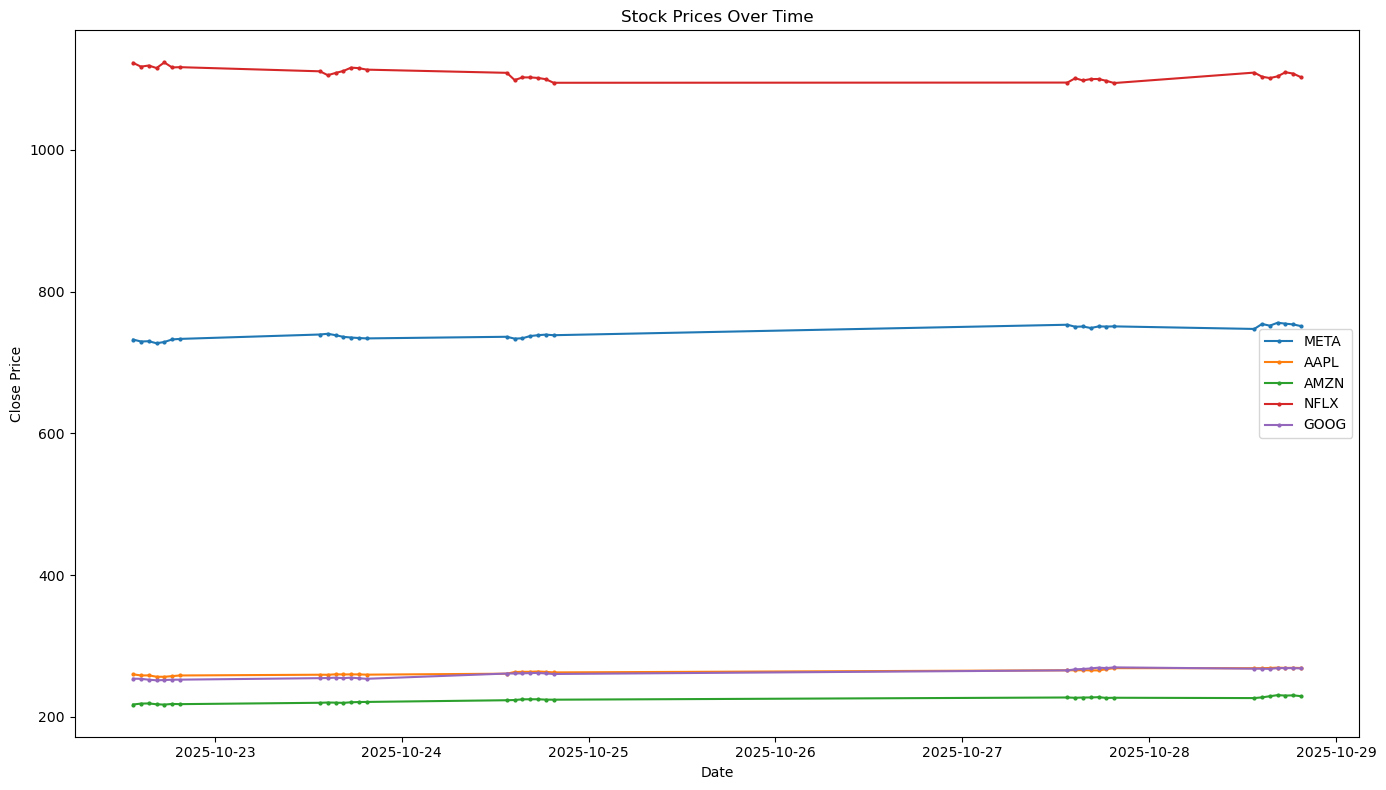

<Figure size 640x480 with 0 Axes>

In [14]:
### Attempt to do plot and write to file

# Look for latest file
latest_csv_filename = get_the_latest_file()
print("The latest file name is:", latest_csv_filename)
logging.info(f"Loading data from file: {latest_csv_filename}")
# pull the date and timestamp out of file name
filename_only = os.path.basename(latest_csv_filename)  # get filename without path
print("Filename only:", filename_only)
# remove file extension from filename - in this case .csv
filename_no_ext = os.path.splitext(filename_only)[0]
print("Filename without extension:", filename_no_ext)
# create png filename 
filename_png = filename_no_ext + ".png"
print("PNG Filename:", filename_png)
df = load_file_into_dataframe(latest_csv_filename)
data_path = "./data/"

# create full path for png file
png_file_path = os.path.join(data_path, filename_png)
print("PNG File Path:", png_file_path)
# Best practice: create a figure and an axis object
fig, ax = plt.subplots(figsize=(14, 8))
df.reset_index(inplace=True)
print(df['Datetime'])
#print("X Timestamps:", df['Date'])
for ticker in tickers:
    # display df.index on x-axis in date format
    # don't display dates with no data points
    ax.plot(df['Datetime'], df[(ticker, 'Close')], label=ticker, marker='o', markersize=2, scalex=True)
ax.set_xlabel('Date')
#ax.set_xticks(rotation=45)
ax.set_ylabel('Close Price')
ax.set_title('Stock Prices Over Time')
ax.legend()
plt.tight_layout()
plt.show()
plt.savefig(png_file_path)

In [15]:
def plot_data(df, png_file_path):
    """plot_data

    Args:
        df (pd.DataFrame): The data as a pandas DataFrame.
        png_file_path (str): The path to save the plot image.

    Returns:
        None
    """
    if df is None or png_file_path is None:
        logging.error("DataFrame or PNG file path is None.")
        return
    plt.figure(figsize=(14, 8))
    for ticker in tickers:
        plt.plot(df.index, df[(ticker, 'Close')], label=ticker)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Stock Prices Over Time')
    plt.legend()
    plt.savefig(png_file_path)
    logging.info(f"Plot saved to {png_file_path}")

INFO:root:Plot saved to ./data/20251029_213320.png


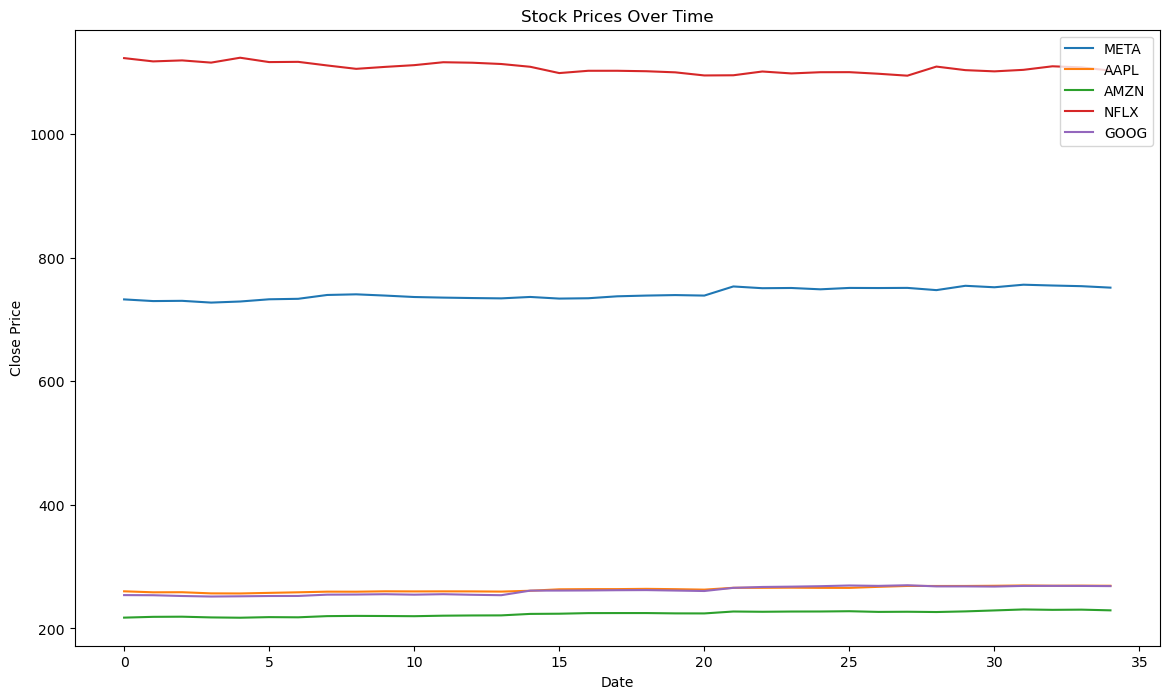

In [16]:
plot_data(df, png_file_path)
#------------------------------------------------------------------------------


Try alternatives to plotting data 


In [17]:

# Look for latest file
latest_csv_filename = get_the_latest_file()
print("The latest file name is:", latest_csv_filename)
logging.info(f"Loading data from file: {latest_csv_filename}")
# pull the date and timestamp out of file name
filename_only = os.path.basename(latest_csv_filename)  # get filename without path
print("Filename only:", filename_only)
# remove file extension from filename - in this case .csv
filename_no_ext = os.path.splitext(filename_only)[0]
print("Filename without extension:", filename_no_ext)
# create png filename 
filename_png = filename_no_ext + ".png"
print("PNG Filename:", filename_png)
df = load_file_into_dataframe(latest_csv_filename)
df

INFO:root:Getting the latest file from ./data/
INFO:root:Latest file: ./data\20251029_213320.csv
INFO:root:Loading data from file: ./data\20251029_213320.csv
INFO:root:Latest file: ./data\20251029_213320.csv
INFO:root:Loading data from file: ./data\20251029_213320.csv


The latest file name is: ./data\20251029_213320.csv
Filename only: 20251029_213320.csv
Filename without extension: 20251029_213320
PNG Filename: 20251029_213320.png


Ticker                            NFLX                                         \
Price                             Open         High          Low        Close   
Datetime                                                                        
2025-10-22 13:30:00+00:00  1143.359985  1157.500000  1122.390015  1122.729980   
2025-10-22 14:30:00+00:00  1123.280029  1125.469971  1114.650024  1117.420044   
2025-10-22 15:30:00+00:00  1117.385010  1124.520020  1115.783447  1119.015015   
2025-10-22 16:30:00+00:00  1118.920044  1119.539917  1112.519043  1115.444946   
2025-10-22 17:30:00+00:00  1115.439941  1123.680054  1114.500000  1123.359985   
2025-10-22 18:30:00+00:00  1123.140015  1125.849976  1115.599976  1116.295044   
2025-10-22 19:30:00+00:00  1116.540039  1121.472290  1115.157959  1116.689941   
2025-10-23 13:30:00+00:00  1126.900024  1127.828491  1106.890015  1110.844971   
2025-10-23 14:30:00+00:00  1110.750122  1115.479980  1103.520020  1105.369873   
2025-10-23 15:30:00+00:00  1105.000000  1108.640015  1099.729980  1108.545044   
2025-10-23 16:30:00+00:00  1108.495972  1116.500000  1107.109985  1111.329956   
2025-10-23 17:30:00+00:00  1111.725342  1117.280029  1111.339966  1116.060059   
2025-10-23 18:30:00+00:00  1116.098022  1117.780029  1113.330078  1115.280029   
2025-10-23 19:30:00+00:00  1115.599976  1117.290039  1113.000000  1113.199951   
2025-10-24 13:30:00+00:00  1111.000000  1114.500000  1096.474976  1108.703125   
2025-10-24 14:30:00+00:00  1108.979858  1108.979858  1094.510010  1098.515259   
2025-10-24 15:30:00+00:00  1098.750000  1102.779907  1095.109985  1102.232056   
2025-10-24 16:30:00+00:00  1102.385010  1105.749878  1102.172852  1102.250244   
2025-10-24 17:30:00+00:00  1102.420044  1103.499878  1099.750000  1101.500000   
2025-10-24 18:30:00+00:00  1101.800049  1102.359985  1098.260010  1099.699951   
2025-10-24 19:30:00+00:00  1099.400024  1099.500000  1094.410034  1094.680054   
2025-10-27 13:30:00+00:00  1100.670044  1100.670044  1087.300049  1094.959961   
2025-10-27 14:30:00+00:00  1094.560059  1102.249878  1094.560059  1101.064941   
2025-10-27 15:30:00+00:00  1101.469971  1101.469971  1095.160156  1097.944946   
2025-10-27 16:30:00+00:00  1097.944946  1101.849976  1097.944946  1099.910034   
2025-10-27 17:30:00+00:00  1100.000000  1101.479858  1098.860107  1100.000000   
2025-10-27 18:30:00+00:00  1099.650146  1100.579956  1097.020020  1097.430054   
2025-10-27 19:30:00+00:00  1097.189941  1097.369995  1093.700073  1094.300049   
2025-10-28 13:30:00+00:00  1094.020020  1116.979858  1093.008301  1109.030151   
2025-10-28 14:30:00+00:00  1109.030151  1109.195801  1101.000000  1103.260010   
2025-10-28 15:30:00+00:00  1103.280029  1103.280029  1098.110107  1101.296143   
2025-10-28 16:30:00+00:00  1101.290039  1105.619995  1098.599976  1103.755127   
2025-10-28 17:30:00+00:00  1103.699951  1110.790039  1103.699951  1109.500000   
2025-10-28 18:30:00+00:00  1109.390015  1111.489868  1102.280029  1107.680054   
2025-10-28 19:30:00+00:00  1107.660034  1107.910034  1102.000000  1102.510010   

Ticker                                    GOOG                          \
Price                       Volume        Open        High         Low   
Datetime                                                                 
2025-10-22 13:30:00+00:00  5915248  255.039993  257.079987  253.664993   
2025-10-22 14:30:00+00:00  2607312  253.925003  257.179993  252.869995   
2025-10-22 15:30:00+00:00  1299285  253.720001  254.830002  252.279999   
2025-10-22 16:30:00+00:00  1209837  252.410004  252.770004  250.451004   
2025-10-22 17:30:00+00:00  1022550  251.580002  252.220001  250.624207   
2025-10-22 18:30:00+00:00   964885  251.970001  252.759995  251.576401   
2025-10-22 19:30:00+00:00  1005395  252.399994  252.759995  251.679993   
2025-10-23 13:30:00+00:00  2028338  253.850006  255.860001  252.768295   
2025-10-23 14:30:00+00:00   867873  254.649597  255.610001  253.949997   
2025-10-23 15:30:00+00:00  120351

PNG File Path: ./data/20251029_213320.png


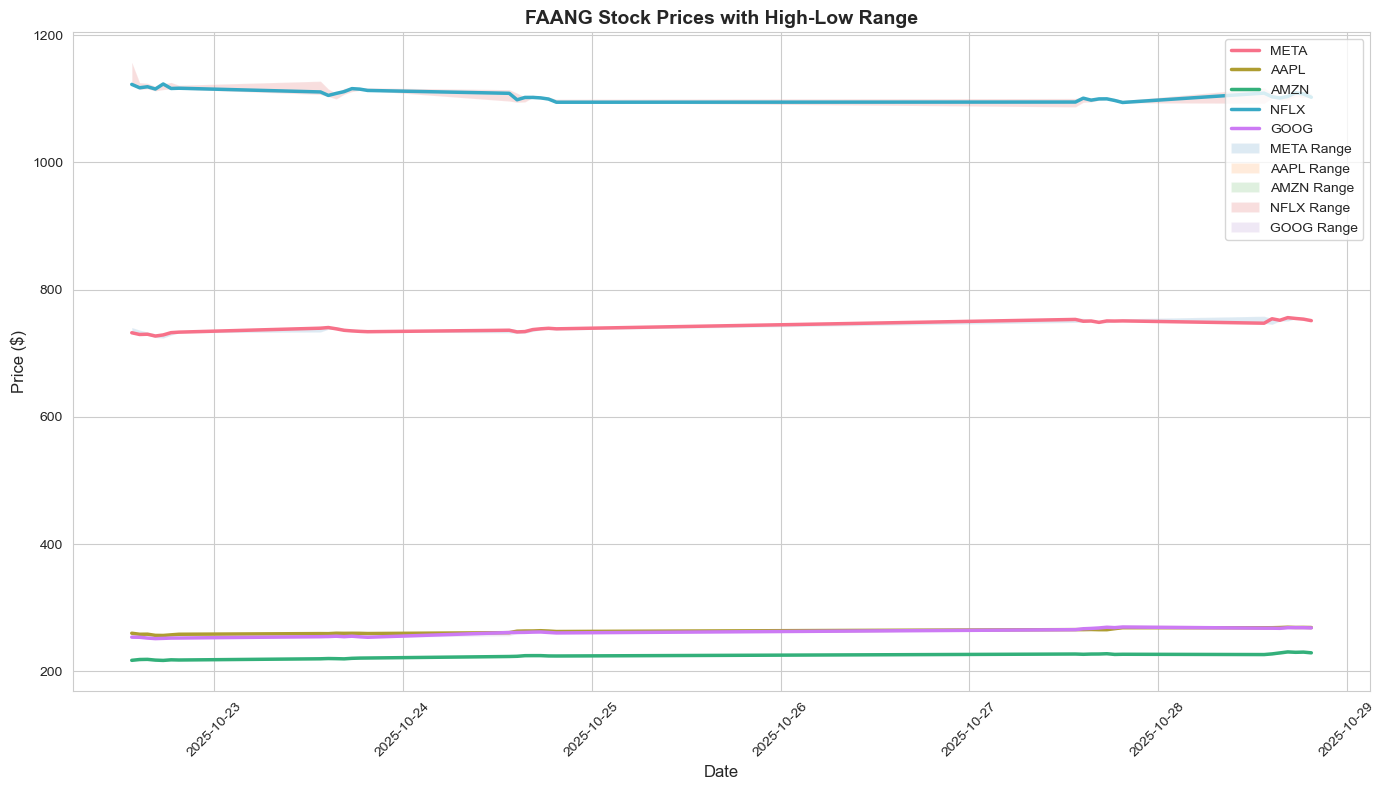

In [18]:
print("PNG File Path:", png_file_path)

# Prepare data for seaborn plotting - reshape for long format
plot_data = []
for ticker in tickers:
    ticker_data = pd.DataFrame({
        'Date': df.index,
        'Close': df[(ticker, 'Close')].values,
        'High': df[(ticker, 'High')].values,
        'Low': df[(ticker, 'Low')].values,
        'Ticker': ticker
    })
    plot_data.append(ticker_data)

# Combine all ticker data
combined_data = pd.concat(plot_data, ignore_index=True)

# Create seaborn plot with proper styling
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot close prices using seaborn
sns.lineplot(data=combined_data, x='Date', y='Close', hue='Ticker', 
             palette='husl', linewidth=2.5)

# Add shaded areas for high-low ranges
for ticker in tickers:
    ticker_subset = combined_data[combined_data['Ticker'] == ticker]
    plt.fill_between(ticker_subset['Date'], 
                     ticker_subset['High'], 
                     ticker_subset['Low'], 
                     alpha=0.15, 
                     label=f'{ticker} Range')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('FAANG Stock Prices with High-Low Range', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()
plt.savefig(png_file_path, dpi=300, bbox_inches='tight')

In [19]:
# Data is already in the right format - combined_data has Date, Close, High, Low, Ticker
# Now normalize the price data to 0-1 range for each ticker individually
normalized_data = combined_data.copy()

# Normalize each ticker separately
for ticker in tickers:
    ticker_mask = normalized_data['Ticker'] == ticker
    for column in ['Close', 'High', 'Low']:
        ticker_values = normalized_data.loc[ticker_mask, column]
        min_val = ticker_values.min()
        max_val = ticker_values.max()
        normalized_data.loc[ticker_mask, column] = (ticker_values - min_val) / (max_val - min_val)

print("Normalized data (first 10 rows):")
print(normalized_data.head(10))

Normalized data (first 10 rows):
                       Date     Close      High       Low Ticker
0 2025-10-22 13:30:00+00:00  0.178647  0.390621  0.232980   META
1 2025-10-22 14:30:00+00:00  0.085004  0.255169  0.185614   META
2 2025-10-22 15:30:00+00:00  0.098481  0.146526  0.142857   META
3 2025-10-22 16:30:00+00:00  0.000000  0.052380  0.027841   META
4 2025-10-22 17:30:00+00:00  0.060736  0.000000  0.000000   META
5 2025-10-22 18:30:00+00:00  0.184521  0.125301  0.148160   META
6 2025-10-22 19:30:00+00:00  0.211818  0.154742  0.272455   META
7 2025-10-23 13:30:00+00:00  0.426054  0.452926  0.313224   META
8 2025-10-23 14:30:00+00:00  0.461990  0.404313  0.455751   META
9 2025-10-23 15:30:00+00:00  0.392192  0.441630  0.453679   META


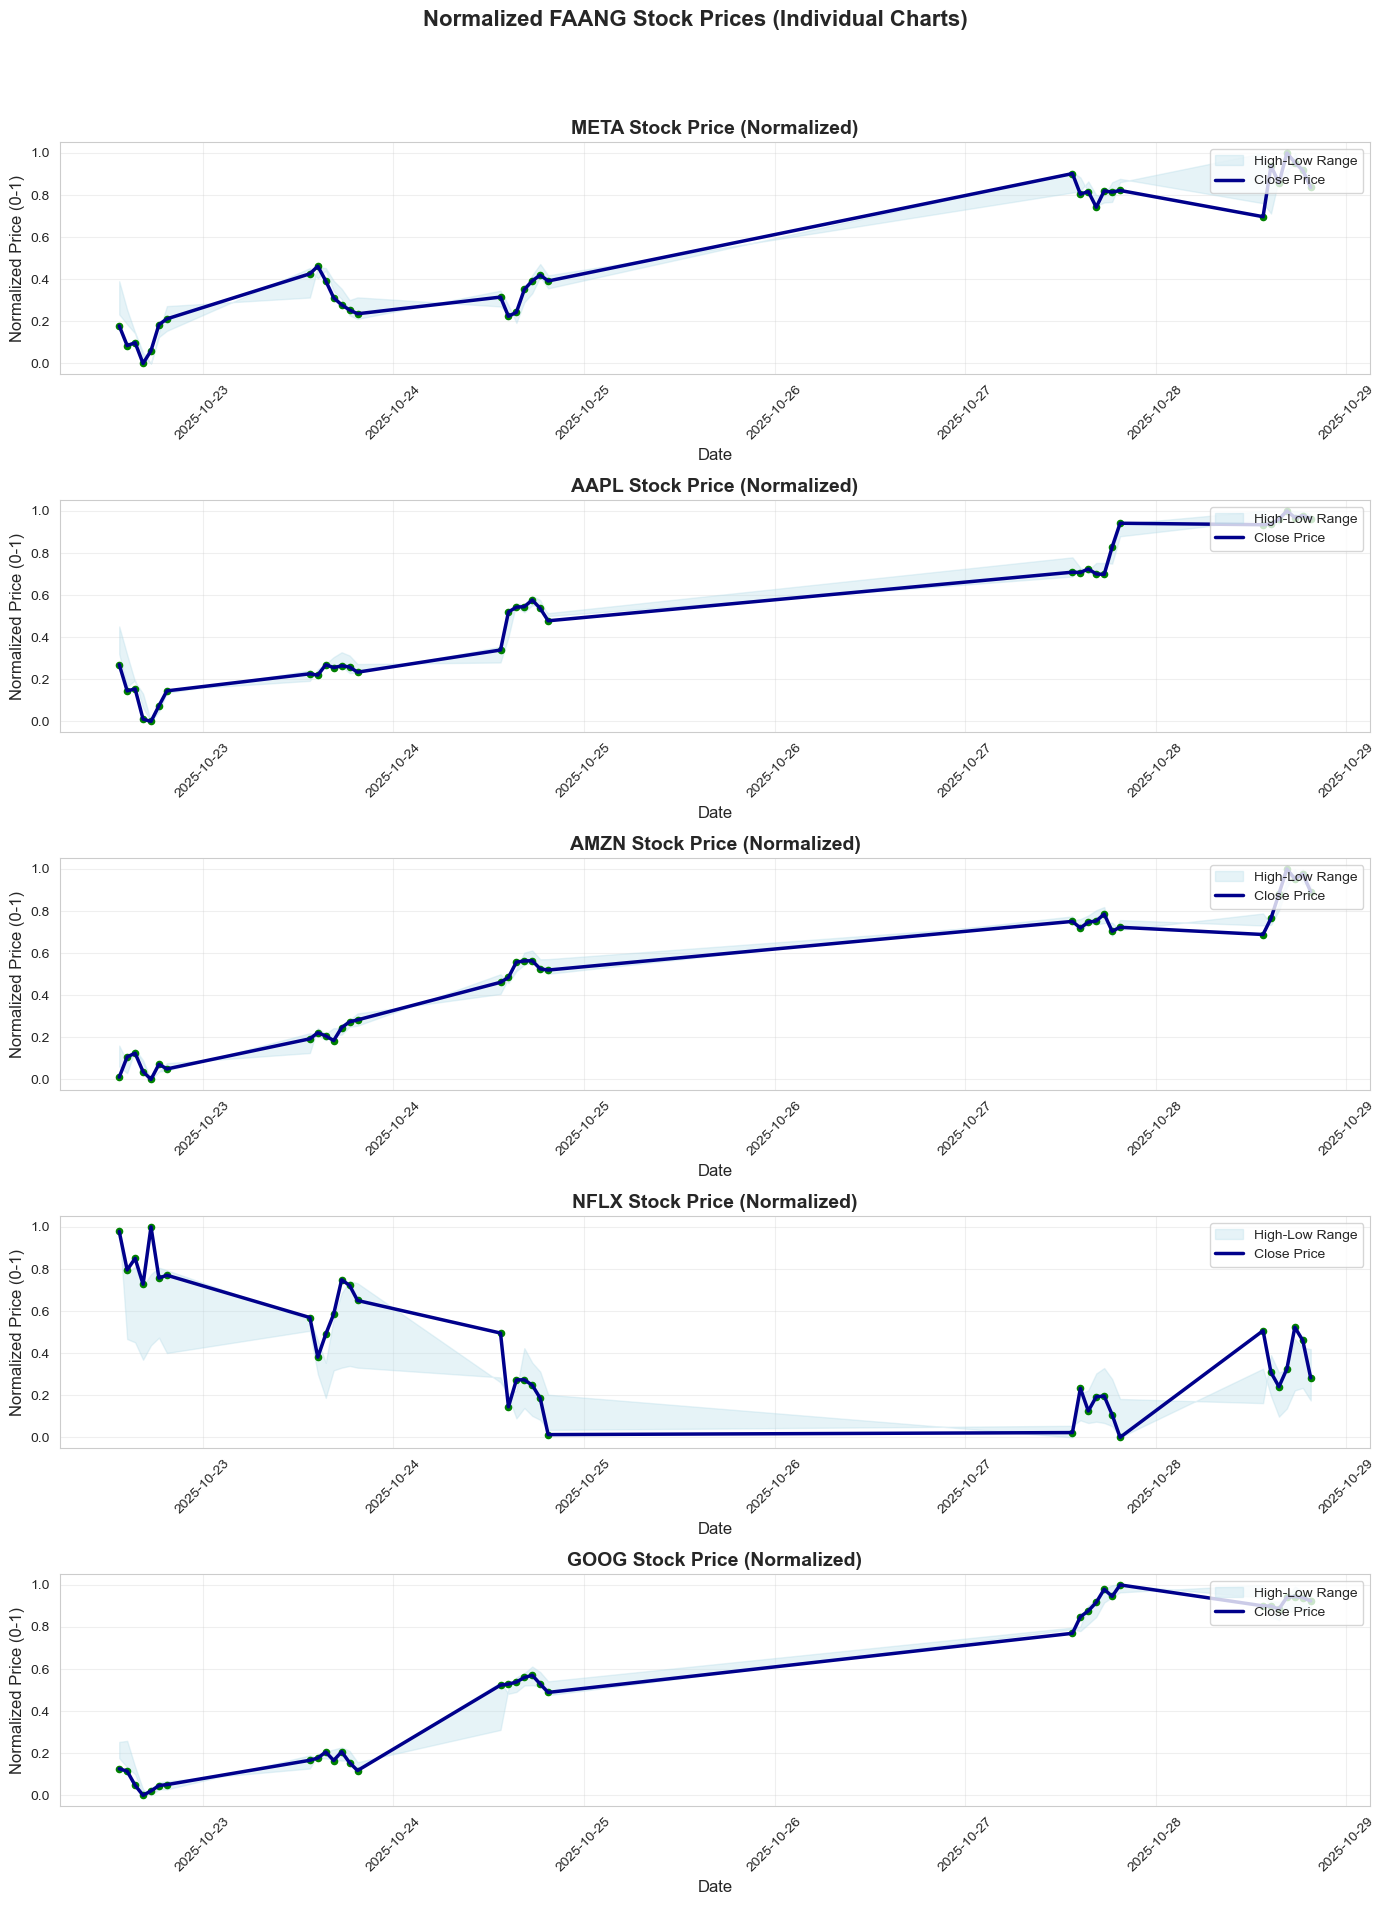

Normalized individual plots saved to: ./data/20251029_213320_normalized_individual.png


<Figure size 640x480 with 0 Axes>

In [20]:
# Create separate plots for each ticker using normalized data
# Note: This was all done using vibe coding using vscode and github copilot
fig, axes = plt.subplots(len(tickers), 1, figsize=(14, 4 * len(tickers)))
fig.suptitle('Normalized FAANG Stock Prices (Individual Charts)', fontsize=16, fontweight='bold', y=0.98)

for i, ticker in enumerate(tickers):
    # Filter data for current ticker
    ticker_data = normalized_data[normalized_data['Ticker'] == ticker].copy()
    ticker_data = ticker_data.sort_values('Date')
    
    ax = axes[i]
    
    # Plot shaded area between high and low
    ax.fill_between(ticker_data['Date'], 
                   ticker_data['High'], 
                   ticker_data['Low'], 
                   alpha=0.3, 
                   color='lightblue',
                   label='High-Low Range')
    
    # Plot close price line
    sns.lineplot(data=ticker_data, x='Date', y='Close', 
                ax=ax, color='darkblue', linewidth=2.5, label='Close Price')
    # Mark each data point with a small circle
    ax.scatter(ticker_data['Date'], ticker_data['Close'], color='green', s=20)
    
    ax.set_title(f'{ticker} Stock Price (Normalized)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Normalized Price (0-1)', fontsize=12)
    ax.legend(loc='upper right')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Save the plot
normalized_png_path = png_file_path.replace('.png', '_normalized_individual.png')
plt.savefig(normalized_png_path, dpi=300, bbox_inches='tight')
print(f"Normalized individual plots saved to: {normalized_png_path}")

__Gemini Prompt__

How do I plot a time series in such a way that that so missing time is not included and the gap between each time series is consistent

The recommendation is too plot against the index , and not the time

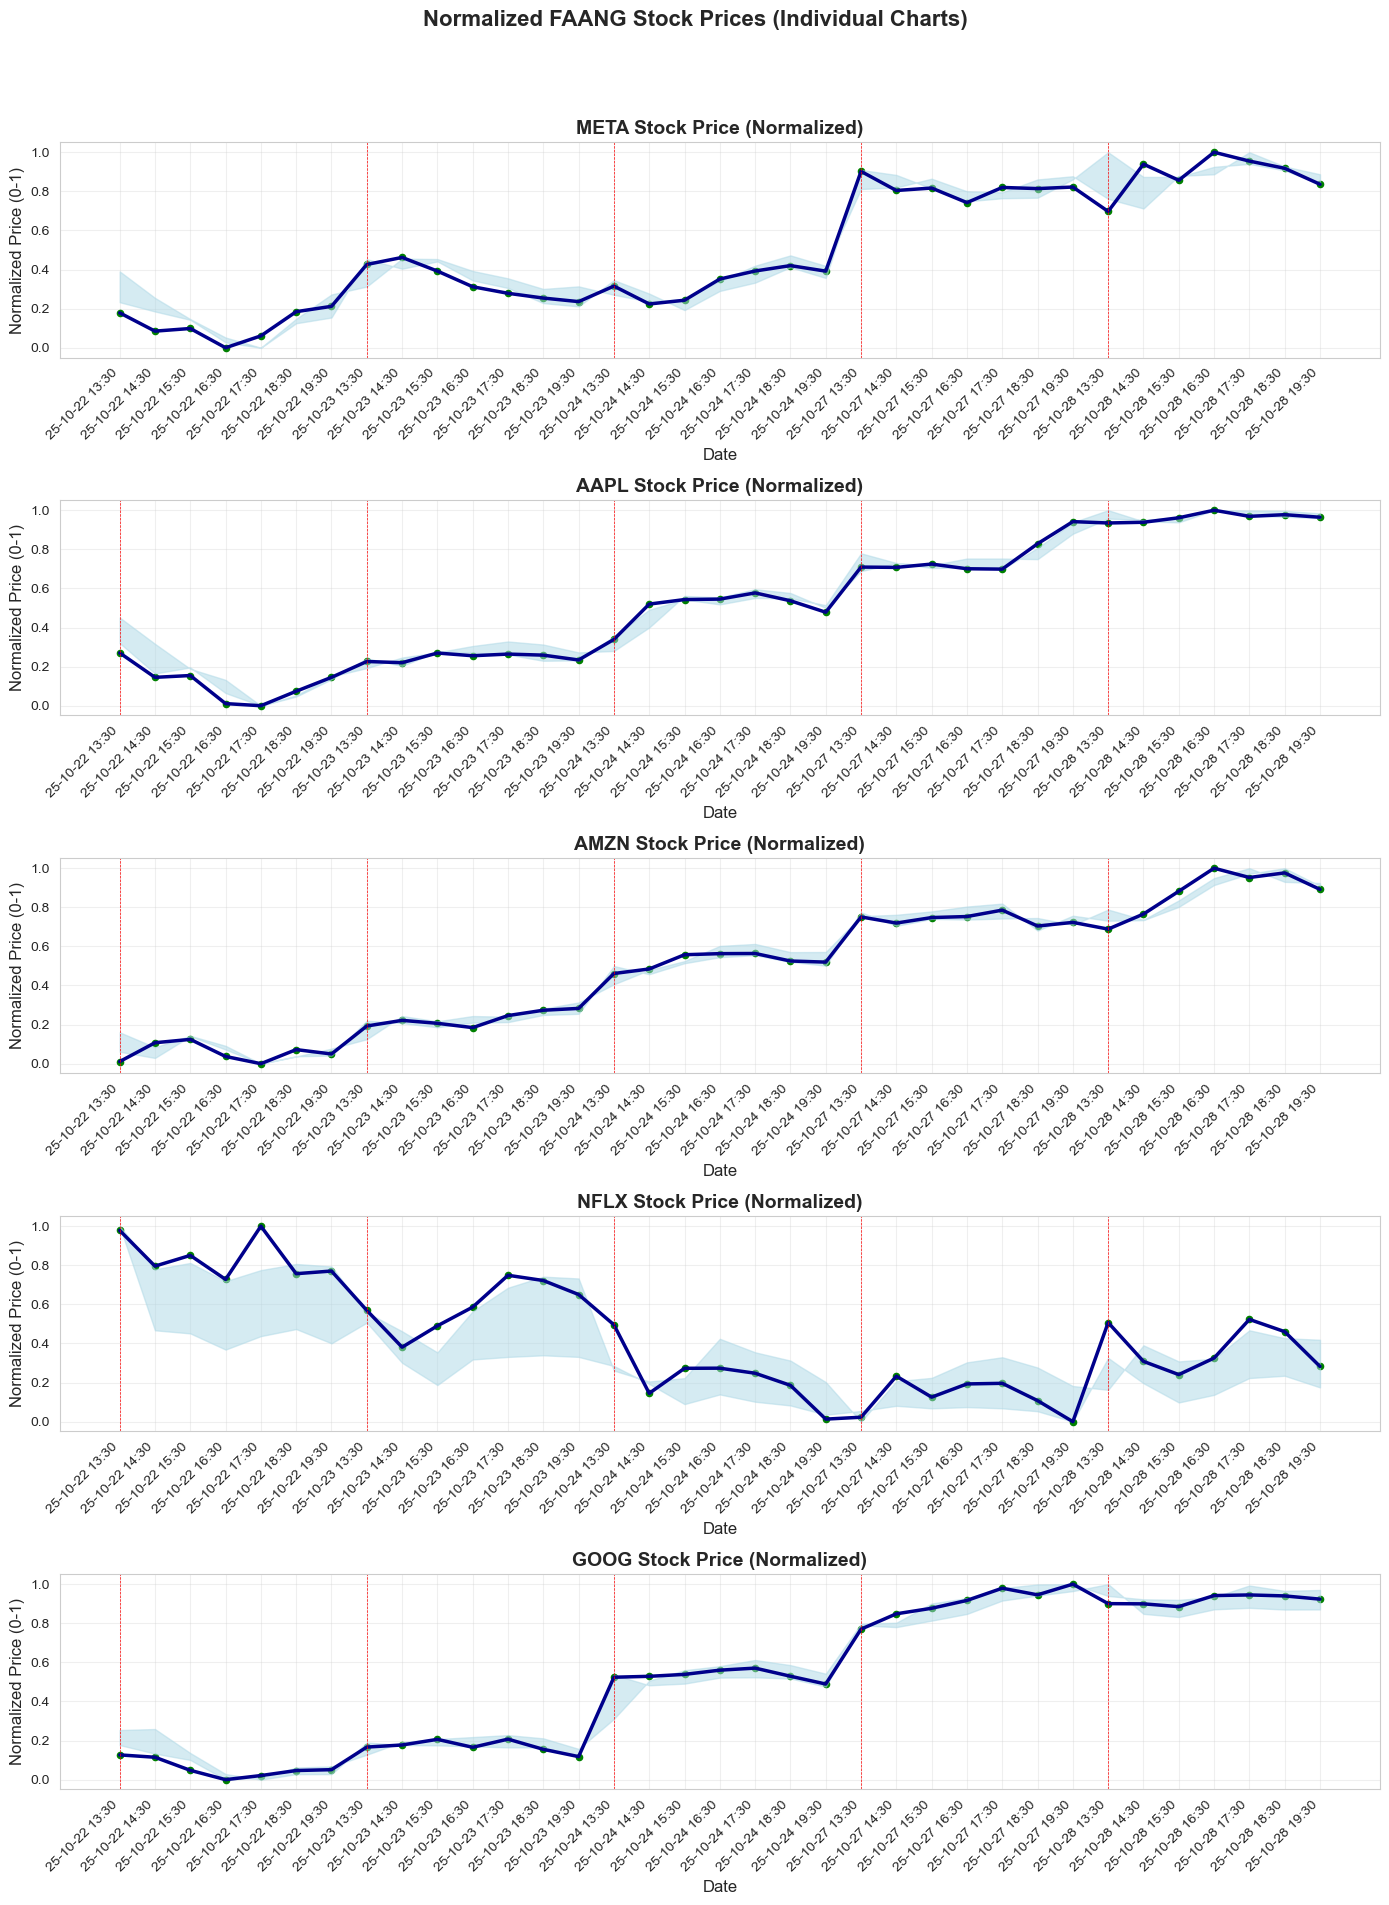

Normalized individual plots saved to: ./data/20251029_213320_normalized_individual.png


,Date,Close,High,Low,Ticker,date_ind
Date_Index,,,,,,
1.0,2025-10-22 13:30:00+00:00,0.178647,0.390621,0.232980,META,NaN
2.0,2025-10-22 14:30:00+00:00,0.085004,0.255169,0.185614,META,0.0
3.0,2025-10-22 15:30:00+00:00,0.098481,0.146526,0.142857,META,0.0
4.0,2025-10-22 16:30:00+00:00,0.000000,0.052380,0.027841,META,0.0
5.0,2025-10-22 17:30:00+00:00,0.060736,0.000000,0.000000,META,0.0
...,...,...,...,...,...,...
31.0,2025-10-28 15:30:00+00:00,0.884931,0.831942,0.919688,GOOG,0.0
32.0,2025-10-28 16:30:00+00:00,0.941518,0.871111,0.933440,GOOG,0.0
33.0,2025-10-28 17:30:00+00:00,0.944756,0.878914,0.992849,GOOG,0.0


<Figure size 640x480 with 0 Axes>

In [21]:
# Create separate plots for each ticker using normalized data
# Note: This was all done using vibe coding using vscode and github copilot
fig, axes = plt.subplots(len(tickers), 1, figsize=(14, 4 * len(tickers)))
fig.suptitle('Normalized FAANG Stock Prices (Individual Charts)', fontsize=16, fontweight='bold', y=0.98)

# add a new column to behave as a index on the time series
normalized_data['Date_Index'] = normalized_data['Date'].rank(method='dense')
# This will set indicator to 1 for the start of each new day
normalized_data['date_ind'] = normalized_data['Date'].dt.date.rank(method='dense').diff(1)
# set Date_Index as index
normalized_data.set_index('Date_Index', inplace=True)

for i, ticker in enumerate(tickers):
    # Filter data for current ticker
    ticker_data = normalized_data[normalized_data['Ticker'] == ticker].copy()
    ticker_data = ticker_data.sort_values('Date_Index')
    
    ax = axes[i]
    ax.plot(ticker_data.index, ticker_data['Close'], color='darkblue', linewidth=2.5, label='Close Price')

    ax.scatter(ticker_data.index, ticker_data['Close'], color='green', s=20, label='Close Price')
    # Plot shaded area between high and low
    ax.fill_between(ticker_data.index, ticker_data['Low'], ticker_data['High'], color='lightblue', alpha=0.5)
    ax.set_title(f'{ticker} Stock Price (Normalized)', fontsize=14, fontweight='bold')
    # Add vertical lines for each day
    for x in ticker_data.index:
        # get date_ind for x
        date_ind = ticker_data['date_ind'].loc[x]
        # if start of new day , draw vertical line
        if pd.notna(date_ind) and date_ind != 0:
            ax.axvline(x=x, color='red', linestyle='--', linewidth=0.5)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Normalized Price (0-1)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(ticker_data.index)
    # draw a line per start of each day
    ax.set_xticklabels(ticker_data['Date'].dt.strftime('%y-%m-%d %H:%M'), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Save the plot
normalized_png_path = png_file_path.replace('.png', '_normalized_individual.png')
plt.savefig(normalized_png_path, dpi=300, bbox_inches='tight')
print(f"Normalized individual plots saved to: {normalized_png_path}")
normalized_data